In [1]:
from matplotlib import pyplot as plt
import requests
import pandas as pd

plt.style.use('seaborn-darkgrid')

In [2]:
url = 'http://0.0.0.0:8989/today.json'

In [3]:
# Fetch data
res = requests.get(url)

if res.ok:
    data_str = res.content
else:
    print(res.content)

In [4]:
# Load into DataFrame
df0 = pd.read_json(data_str).set_index('date')

In [5]:
# sky - ambient (cloudiness) with a rolling mean of 30 entries.
cloudiness = (df0.sky_temp_C - df0.ambient_temp_C).rolling(30, center=True).mean()

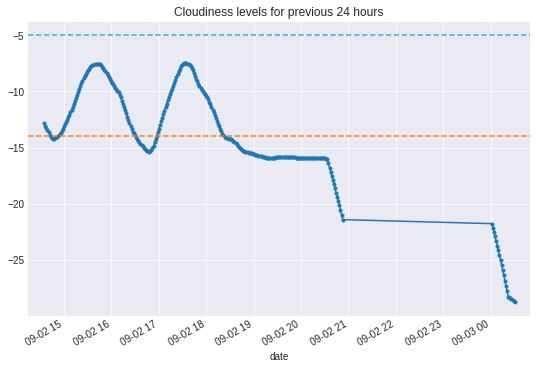

In [6]:
# Plot the cloudiness
ax = cloudiness.plot(figsize=(9, 6), marker='.')

# Show cloudiness with thresholds
ax.axhline(-14, color='C1', ls='--', label='Cloudy')
ax.axhline(-5, color='C9', ls='--', label='Very Cloudy')

ax.set_title('Cloudiness levels for previous 24 hours');